# IDENTIFICAÇÃO DE CLIENTES DE ALTO VALOR PARA UM PROGRAMA DE FIDELIZAÇÃO

## <font color = "#C71585">PROBLEMA</font>

A empresa All in One Place é uma empresa Outlet Multimarcas, ou seja, ela comercializa produtos de segunda linha de várias marcas a um preço menor, através de um e-commerce. 

Em pouco mais de 1 anos de operação, o time de marketing percebeu que alguns clientes da sua base compram produtos mais caros, com alta frequência e acabam contribuindo com uma parcela significativa do faturamento da empresa. Baseado nessa percepção, o time de marketing vai lançar um programa de fidelidade para os melhores clientes da base, chamado *Insiders*. Mas o time não tem um conhecimento avançado em análise de dados para eleger os participantes do programa. Por esse motivo, o time de marketing requisitou ao time de dados uma seleção de clientes elegíveis ao programa, usando técnicas avançadas de manipulação de dados.

A empresa All In One Place precisa determinar quem são os clientes elegíveis para participar do *Insiders*. Em posse dessa lista, o time de Marketing fará uma sequência de ações personalizadas e exclusivas ao grupo, de modo a aumentar o faturamento e a frequência de compra.

Como resultado para esse projeto, é esperado que seja entregue uma lista de pessoas elegíveis a participar do programa *Insiders*, junto com um relatório respondendo às seguintes perguntas:

1. Quem são as pessoas elegíveis para participar do programa de *Insiders*?
2. Quantos clientes farão parte do grupo?
3. Quais as principais características desses clientes?
4. Qual a porcentagem de contribuição do faturamento vinda do *Insiders*?
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
6. Quais as condições para uma pessoa ser elegível ao *Insiders*?
7. Quais as condições para uma pessoa ser removida do *Insiders*?
8. Qual a garantia que o programa *Insiders* é melhor que o restante da base?
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

## <font color = "#C71585">PLANEJAMENTO DA SOLUÇÃO</font>

***Entrada:***

Selecionar os mais valiosos clientes para formar o programa de fidelidade *Insiders*, tendo como base um conjunto de dados com as vendas de produtos durante 1 ano (Nov 2015 to Dez 2017).

***Saída:***
1. A indicação de pessoas para fazer parte do programa de fidelidade Insiders;
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
    - Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Quais as condições para uma pessoa ser elegível ao Insiders?
    - Quais as condições para uma pessoa ser removida do Insiders?
    - Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

***Tarefas:***
1. Quem são as pessoas elegíveis para participar do programa de Insiders?
    - O que é ser elegível? 
    - O que é um cliente valioso para a empresa?
        - Faturamento:
            - Alto Ticket Médio;
            - Alto LTV;
            - Baixa Recência ou Alta Frequência (tempo entre as compras);
            - Alto Basket Size (quantidade média de produtos comprados);
            - Baixa probabilidade de Churn;
            - Previsão alta de LTV;
            - Alta propensão de compra.              
        - Custo:
            - Baixo número de devoluções.              
        - Experiência:  
            - Média alta de avaliações.


2. Quantos clientes farão parte do grupo?
    - Número de clientes;
    - % em relação ao total de clientes.
    
    
3. Quais as principais características desses clientes?
    - Escrever os principais atributos dos clientes:
        - Idade;
        - País;
        - Salário.      
    - Escrever os principais comportamentos de compra dos clientes (métricas de negócio).


4. Qual a porcentagem de contribuição do faturamento vinda do Insiders?
    - Calcular o faturamento total da empresa durante o ano;
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Cálculo do LTV do grupo Insiders;
    - Séries Temporais (ARMA, ARIMA, HoltWinter, etc).
    
    
6. Quais as condições para uma pessoa ser elegível ao Insiders?
    - Qual o período de avaliação?
    - O desempenho do cliente está próximo da média do cluster Insiders.
    
        
7. Quais as condições para uma pessoa ser removida do Insiders?
    - O desempenho do cliente não está mais próximo da média do cluster Insiders.
    
        
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Teste de Hipóteses;
    - Teste A/B.
    
        
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Descontos;
    - Preferências de escolha;
    - Produtos exclusivos.

## BIBLIOTECAS E CONFIGURAÇÕES

In [101]:
import re

import numpy               as np
import pandas              as pd
import seaborn             as sns
import matplotlib.pyplot   as plt
import umap.umap_          as umap

from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold      import TSNE
from pandas_profiling      import ProfileReport
from sklearn.decomposition import PCA
from yellowbrick.cluster   import KElbowVisualizer, SilhouetteVisualizer
from sklearn.ensemble      import RandomForestRegressor

In [102]:
sns.set_style('whitegrid')

## FUNÇÕES

## 1. OBTENÇÃO DOS DADOS

Os dados utilizado neste projeto podem ser encontrados [aqui](https://www.kaggle.com/datasets/carrie1/ecommerce-data).

In [103]:
df = pd.read_csv('../data/ecommerce.csv', encoding = 'latin1')

### 1.1. Renomear colunas

In [104]:
df.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']

## 2. DESCRIÇÃO DOS DADOS

### 2.1. Informações básicas

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- Há 541909 linhas e 8 colunas na base de dados;
- Há duas colunas com dados faltantes (`description` e `customer_id`).

### 2.2. Limpeza inicial dos dados

#### 2.2.1. Dados faltantes

In [106]:
# divide o conjunto de dados em dois (com e sem dados faltantes)
df_missing = df.loc[df['customer_id'].isna(), :]
df_not_missing = df.loc[~df['customer_id'].isna(), :]

In [107]:
# criação de um dataframe de referência
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())

# substitui os valores ausentes de customer_id
df_backup['customer_id'] = np.arange(19000, 19000 + len(df_backup), 1)

# junta o dataset original com o de referência
df = pd.merge(df, df_backup, on = 'invoice_no', how = 'left')

# combinação de colunas customer_id_x e customer_id_y
df['customer_id'] = df['customer_id_x'].combine_first(df['customer_id_y'])

# exclui colunas extras
df = df.drop(columns = ['customer_id_x', 'customer_id_y'], axis = 1)

#### 2.2.2. Mudança de tipo

In [108]:
# invoice date
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# customer id
df['customer_id'] = df['customer_id'].astype(int)

### 2.3. Estatística descritiva

In [109]:
num_attributes = df[['quantity', 'unit_price', 'customer_id']].copy()
cat_attributes = df[['invoice_no', 'stock_code', 'description', 'country']].copy()

#### 2.3.1. Atributos numéricos

In [110]:
# tendência central: média e mediana 
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
             
# dispersão: desvio padrão, mínimo, máximo, intervalo, assimetria (skew) e curtose
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenação
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['Atributos', 'Mínimo', 'Máximo', 'Intervalo', 'Média', 'Mediana', 'Desvio padrão', 'assimetria', 'Curtose']
m

,Atributos,Mínimo,Máximo,Intervalo,Média,Mediana,Desvio padrão,assimetria,Curtose
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


**Observação:**

- A quantidade de produtos é negativo -> pode ser devolução dos produtos comprados. 
- O preço unitário é negativo -> pode se desconto ou o valor estornado do produto que é devolvido.

#### 2.3.2. Atributos categóricos

***invoice_no***

In [111]:
# PROBLEMA: há valores de invoice_no com letras
df_letter_invoices = df.loc[df['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

print(f'Quantidade total de compras: {len(df_letter_invoices)}')
print(f'Quantidade total de valores negativos para quantidades: {len(df_letter_invoices[df_letter_invoices.quantity < 0])}')

Quantidade total de compras: 9291
Quantidade total de valores negativos para quantidades: 9288


***stock_code***

In [112]:
# PROBLEMA: há caracteres estranhos do stock_code
df.loc[df['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code'].unique()

# AÇÃO: remover os caracteres estranhos pois não há uma explicação do que cada um significa 

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

***country***

In [113]:
# PROBLEMA 1: há compras com o país de origem não especificado
# PROBLEMA 2: há compras feitas em um país hamado Comunidade Europeia
df['country'].unique()

# AÇÃO: deletar esses registros e pesquisar sobre a Comunidade Europeia

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## 3. LIMPEZA DOS DADOS

***unit_price***

In [114]:
# deleta registros cujo preço é menor que $0.04
df = df.loc[df['unit_price'] >= 0.04, :]

***stock_code***

In [115]:
# deleta registros cujo stock_code possui caracteres estranhos
df = df[~df['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 
                                'B', 'CRUK'])]

***description***

In [116]:
# deleta a coluna description
df = df.drop(columns = 'description', axis = 1)

***country***

In [117]:
# deleta registros cujo país não está especificado ou pertence a Comunidade Europeia
df = df[~df['country'].isin(['European Community', 'Unspecified'])]

***quantity***

In [118]:
# cria dois conjuntos de dados, um contendo apenas as compras e outro os produtos devolvidos
df_returns = df.loc[df['quantity'] < 0, :].reset_index(drop = True)
df_purchases = df.loc[df['quantity'] >= 0, :].reset_index(drop = True)

## 4. CRIAÇÃO DE VARIÁVEIS

In [119]:
# criação de um dataframe de referência
df_ref = df_purchases.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], 
                            axis = 1).drop_duplicates(ignore_index = True).copy()

***gross_revenue***

In [120]:
# gross_revenue: faturamento por compra
df_purchases['gross_revenue'] = df_purchases['quantity'] * df_purchases['unit_price']

# faturamento por cliente
df_aux = df_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_aux, on = 'customer_id', how = 'left')

***recency_days***

In [121]:
# recency: recência (data da última compra)
# última compra feita por cada cliente
df_aux = df_purchases[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()

# diferença entre a última data de coleta dos dados e a última compra feita por cada cliente
df_aux['recency_days'] = (df_purchases['invoice_date'].max() - df_aux['invoice_date']).dt.days

# populando o dataframe de referência
df_aux = df_aux[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_aux, on = 'customer_id', how = 'left')

***qtde_invoices***

In [122]:
# qtde_invoices: quantidade de compras feitas por cliente
df_aux = (df_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                            .groupby('customer_id')
                                                            .count()
                                                            .reset_index()
                                                            .rename(columns = {'invoice_no': 'qtde_invoices'}))

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux, on = 'customer_id', how = 'left')

***qtde_items***

In [123]:
# qtde_items: quantidade total de produtos comprados
# quantidade de produtos
df_aux = (df_purchases.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum()
                                                          .reset_index()
                                                          .rename(columns = {'quantity': 'qtde_items'}))

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux, on = 'customer_id', how = 'left')

***qtde_products***

In [124]:
# qtde_products: quantidade de produtos distintos comprados
df_aux = (df_purchases.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count()
                                                            .reset_index()
                                                            .rename(columns = {'stock_code': 'qtde_products'}))

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux, on = 'customer_id', how = 'left')

***avg_ticket***

In [125]:
# avg_ticket: ticket médio
df_aux = (df_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id')
                                                               .mean()
                                                               .reset_index()
                                                               .rename(columns = {'gross_revenue': 'avg_ticket'}))

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux, on = 'customer_id', how = 'left')

***avg_recency_days***

In [126]:
# avg_recency_days: recência média
df_aux = df[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending = False)

# deslocamento
df_aux['next_customer_id'] = df_aux['customer_id'].shift()    # próxima data
df_aux['previous_date'] = df_aux['invoice_date'].shift()      # próximo invoice_no

df_aux['avg_recency_days'] = df_aux.apply(lambda x: (x['previous_date'] - x['invoice_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis = 1)

df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis = 1).dropna()

# recência média
df_aux2 = df_aux.groupby('customer_id').mean().reset_index()

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux2, on = 'customer_id', how = 'left')

***frequency***

In [127]:
# frequency: frequência de compra
df_aux = (df_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                                     .groupby('customer_id')
                                                                     .agg(max_  = ('invoice_date', 'max'), 
                                                                          min_  = ('invoice_date', 'min'),
                                                                          days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 1),
                                                                          buy_  = ('invoice_no', 'count'))).reset_index()

df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis = 1)

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on = 'customer_id', how = 'left')

***qtde_returns***

In [128]:
# qtde_returns: quantidade de produtos devolvidos
df_aux = (df_returns[['customer_id', 'quantity']].groupby('customer_id')
                                                 .sum()
                                                 .reset_index()
                                                 .rename(columns = {'quantity': 'qtde_returns'}))

df_aux['qtde_returns'] = df_aux['qtde_returns'] * -1

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux, how = 'left', on = 'customer_id')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

***avg_basket_size***

In [129]:
# avg_basket_size: tamanho médio da cesta
df_aux = (df_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                        .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                             n_products = ('quantity', 'sum'))
                                                                        .reset_index())

# cálculo
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# populando o dataframe de referência
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], how = 'left', on = 'customer_id')

***avg_unique_basket_size***

In [130]:
# avg_unique_basket_size: quantidade média de pordutos distintos por cesta
df_aux = (df_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('stock_code', 'nunique'))
                                                                          .reset_index())

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how = 'left', on = 'customer_id')

## 5. ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)

In [132]:
# exclui registros com dados faltantes
df1 = df_ref.dropna()

In [34]:
# relatório contendo a análise univariada
profile = ProfileReport(df1)
profile.to_file('../reports/eda_v1.html')

Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00,  7.09it/s]


### 5.1. Análise univariada

**Métricas a serem observadas**
- Mínimo;
- Máximo;
- Dispersão;
- Média;
- Mediana;
- Desvio padrão;
- Variância;
- Coeficiente de variação;
- Distribuição.

***gross_revenue***

1. Distribuição assimétrica;
2. Coeficiente de variação > 3;
3. 95º percentil = 7237.15 e valor máximo = 279138.02.

Analisar os outliers.

In [35]:
# ordenar a base organizada de maneira decrescente
df1.sort_values('gross_revenue', ascending = False).head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
951,14646,279138.02,1,72,196844,2060,135.503893,4.555556,0.203390,288.0,2733.944444,9.708333
462,18102,259657.30,0,60,64124,431,602.453132,6.555556,0.163488,0.0,1068.733333,2.500000
405,17450,194550.79,7,46,69993,337,577.302047,7.208333,0.127778,952.0,1521.586957,2.695652
3263,16446,168472.50,0,2,80997,3,56157.500000,102.000000,0.009756,80995.0,40498.500000,1.500000
65,14911,140450.72,0,199,80263,5673,24.757751,1.161157,0.536193,3332.0,403.331658,8.974874


In [42]:
# ver o customer 14646 mais de perto
df[df['customer_id'] == 14646].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2010-12-20 10:09:00,0.29,Netherlands,14646
37953,539491,21986,12,2010-12-20 10:09:00,0.29,Netherlands,14646
37954,539491,22720,2,2010-12-20 10:09:00,4.95,Netherlands,14646
37955,539491,21931,1,2010-12-20 10:09:00,1.95,Netherlands,14646
37956,539491,22613,2,2010-12-20 10:09:00,0.85,Netherlands,14646


- O cliente 14646 fez 2062 compras, por isso gastou muito dinheiro na loja. Apesar de ser um valor distoante, faz sentido manter na base.

***qtde_items***

- Um cliente comprou 196844 itens, valor bem superior que os outros. Vamos analiser para ver se esse cliente não é um erro de sistema.

In [43]:
df1[df1['qtde_items'] == 196844]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
951,14646,279138.02,1,72,196844,2060,135.503893,4.555556,0.20339,288.0,2733.944444,9.708333


- Este cliente é o 14646, que foi analisado no item acima.

***qtde_products***

In [44]:
df1[df1['qtde_products'] == 7838]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
71,17841,40967.72,1,124,23053,7838,5.226808,1.838323,0.333333,203.0,185.91129,10.66129


In [45]:
df[df['customer_id'] == 17841].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
1441,C536543,22632,-1,2010-12-01 14:30:00,2.10,United Kingdom,17841
1442,C536543,22355,-2,2010-12-01 14:30:00,0.85,United Kingdom,17841
2037,536557,21495,25,2010-12-01 14:41:00,0.42,United Kingdom,17841
2038,536557,46000R,2,2010-12-01 14:41:00,1.45,United Kingdom,17841
2039,536557,46000S,1,2010-12-01 14:41:00,1.45,United Kingdom,17841


***avg_ticket***

In [46]:
df1[df1['avg_ticket'] == 56157.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
3263,16446,168472.5,0,2,80997,3,56157.5,102.0,0.009756,80995.0,40498.5,1.5


In [47]:
df[df['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2011-05-18 09:52:00,1.65,United Kingdom,16446
194355,553573,22982,1,2011-05-18 09:52:00,1.25,United Kingdom,16446
540421,581483,23843,80995,2011-12-09 09:15:00,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2011-12-09 09:27:00,2.08,United Kingdom,16446


***frequency***

In [48]:
df1[df1['frequency'] == 17]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,371,34,1733,297,18.152222,2.090909,17.0,40.0,50.970588,0.617647


In [50]:
df[df['customer_id'] == 17850].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,17850
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,17850
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,17850


***avg_basket_size***

In [51]:
df1[df1['avg_basket_size'] == 40498.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
3263,16446,168472.5,0,2,80997,3,56157.5,102.0,0.009756,80995.0,40498.5,1.5


### 5.2. Análise bivariada

<Figure size 2500x1200 with 0 Axes>

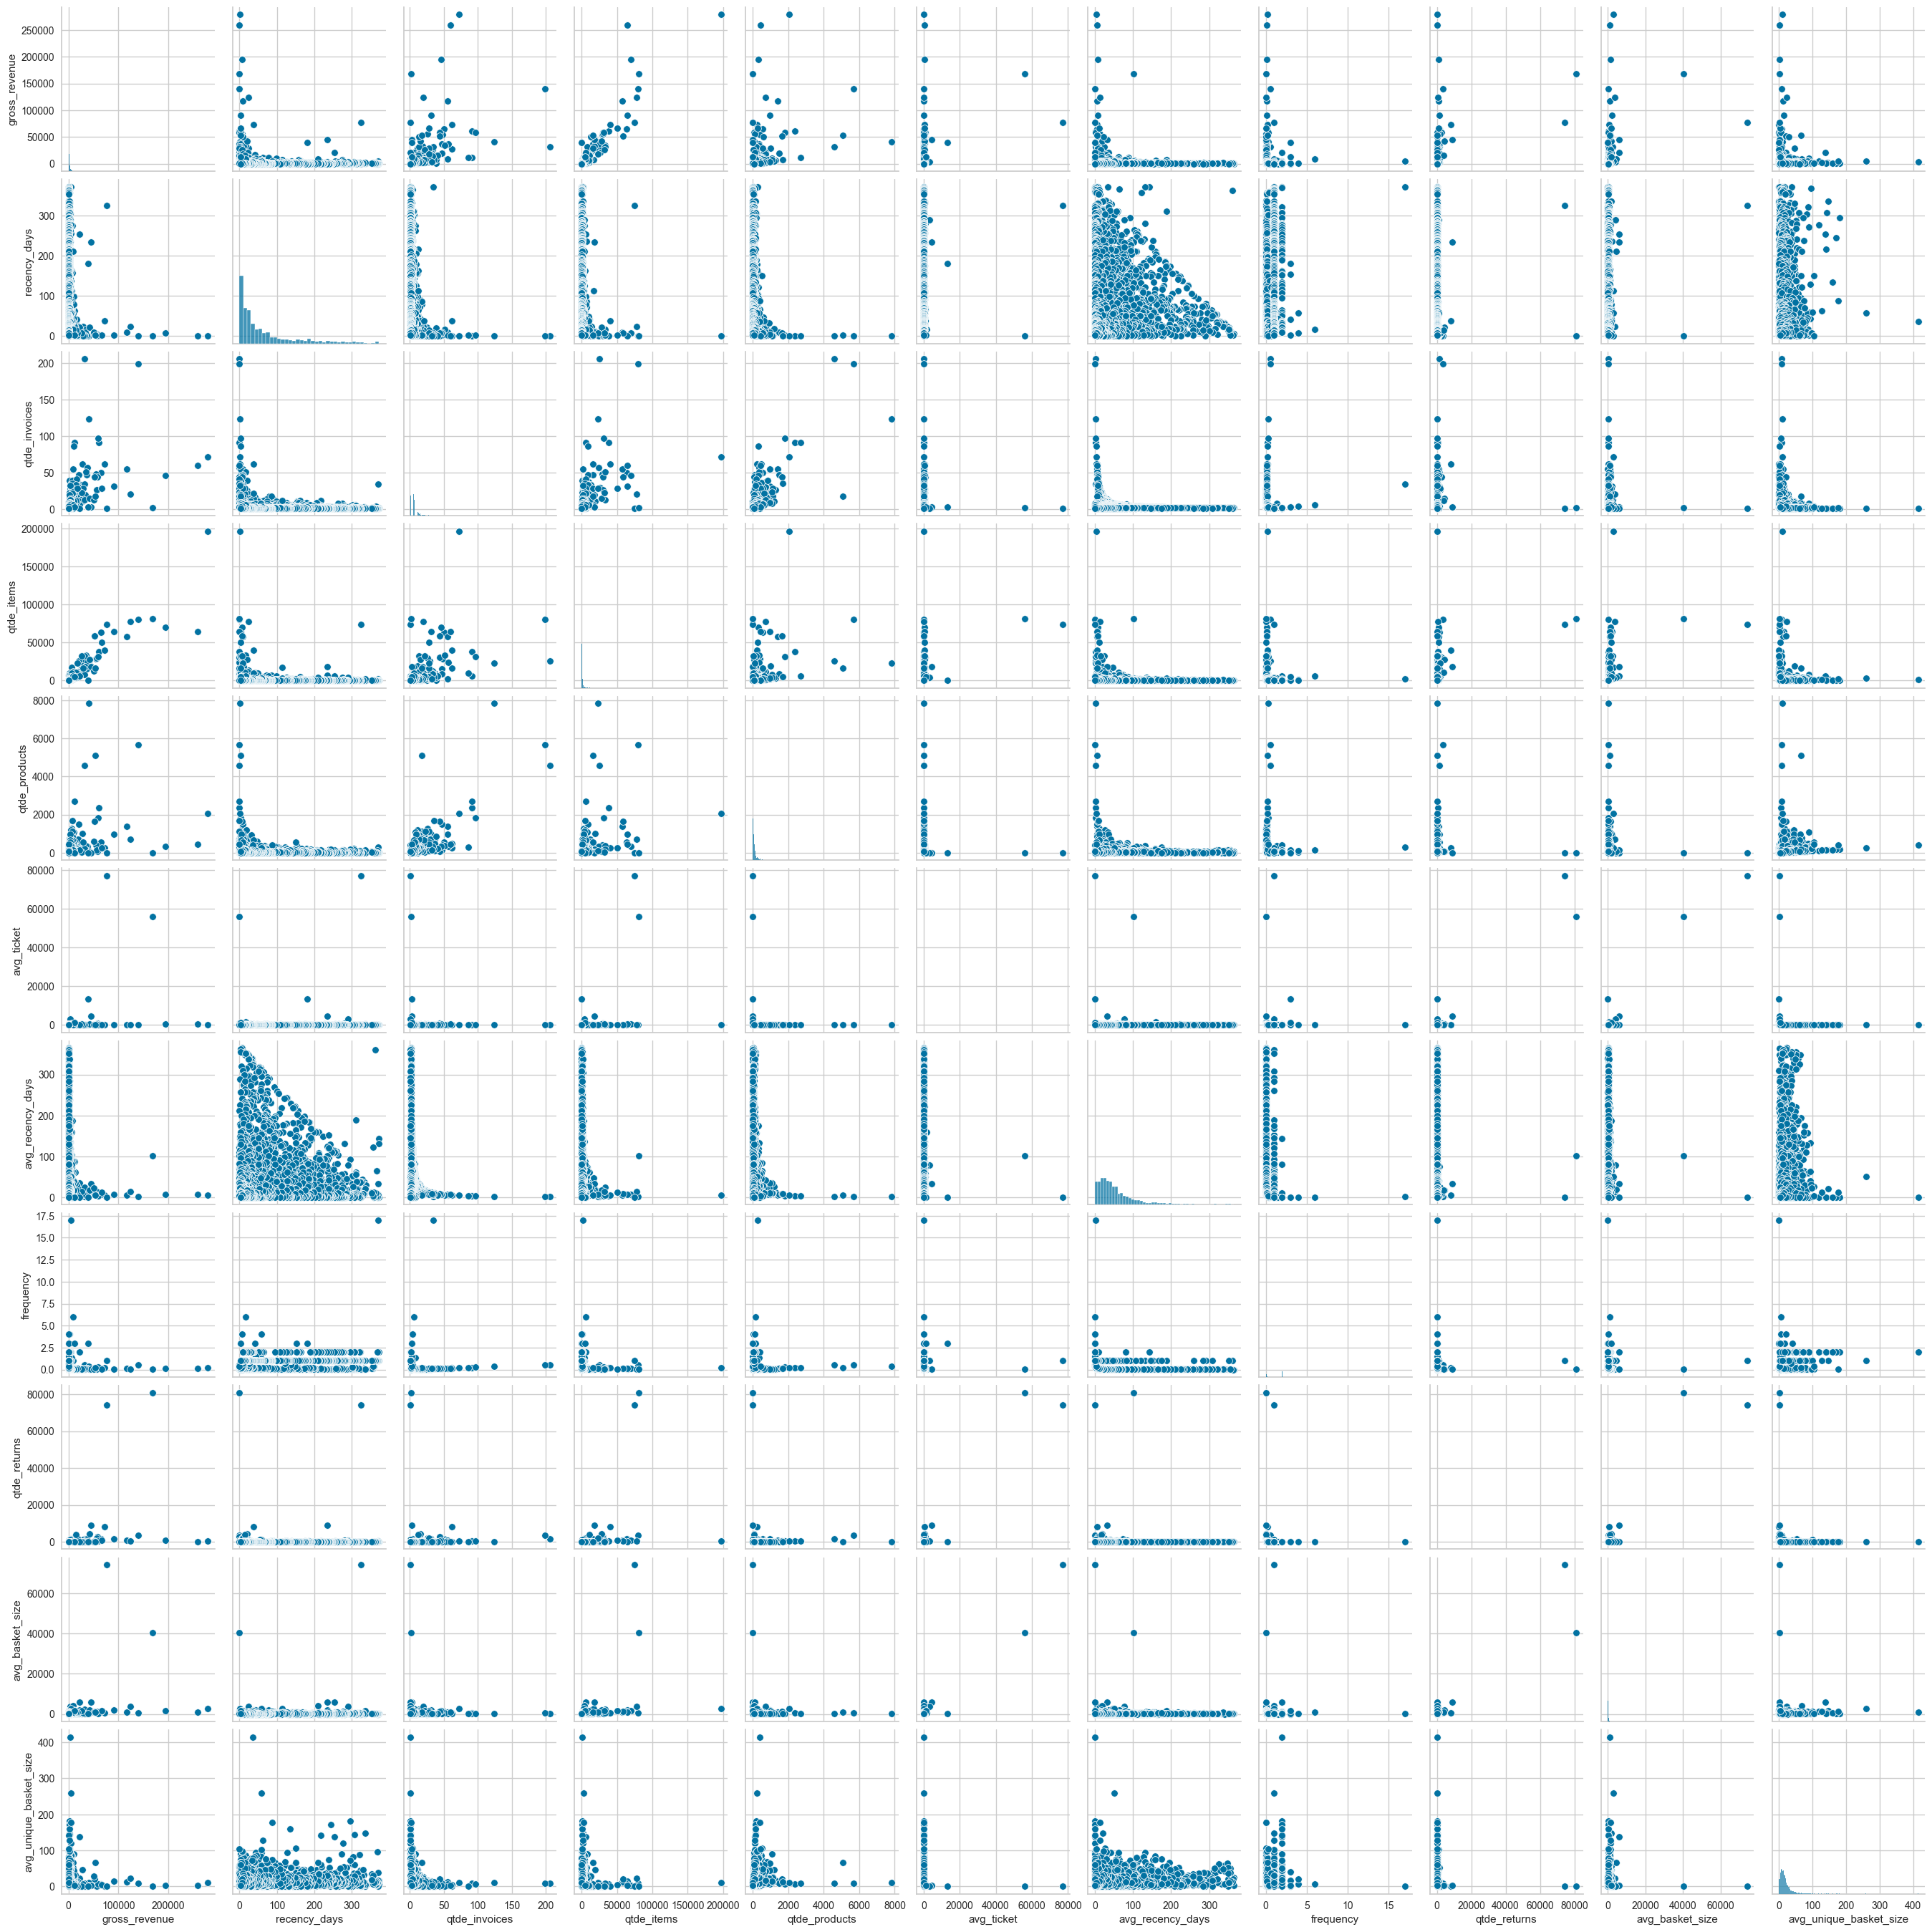

In [52]:
df2 = df1.drop('customer_id', axis = 1)

plt.figure(figsize = (25, 12))
sns.pairplot(df2)

### 5.3. Estudo do espaço

In [133]:
df3 = df1.drop(columns = ['customer_id'], axis = 1).copy()

In [134]:
mm = MinMaxScaler()

# 
df3['gross_revenue']          = mm.fit_transform(df3[['gross_revenue']])
df3['recency_days']           = mm.fit_transform(df3[['recency_days']])
df3['qtde_invoices']          = mm.fit_transform(df3[['qtde_invoices']])
df3['qtde_items']             = mm.fit_transform(df3[['qtde_items']])
df3['qtde_products']          = mm.fit_transform(df3[['qtde_products']])
df3['avg_ticket']             = mm.fit_transform(df3[['avg_ticket']])
df3['avg_recency_days']       = mm.fit_transform(df3[['avg_recency_days']])
df3['frequency']              = mm.fit_transform(df3[['frequency']])
df3['qtde_returns']           = mm.fit_transform(df3[['qtde_returns']])
df3['avg_basket_size']        = mm.fit_transform(df3[['avg_basket_size']])
df3['avg_unique_basket_size'] = mm.fit_transform(df3[['avg_unique_basket_size']])

X = df3.copy()

#### 5.3.1. PCA

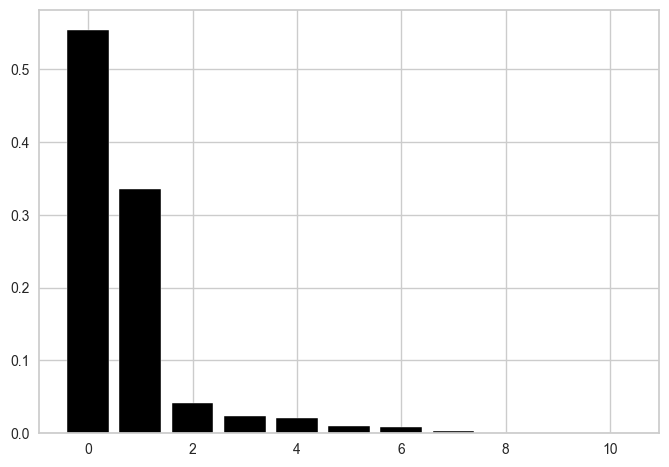

In [135]:
pca = PCA(n_components = X.shape[1])

principal_components = pca.fit_transform(X)

# plot explained variable
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color = 'black')

# pca component
df_pca = pd.DataFrame(principal_components)

<AxesSubplot:xlabel='0', ylabel='1'>

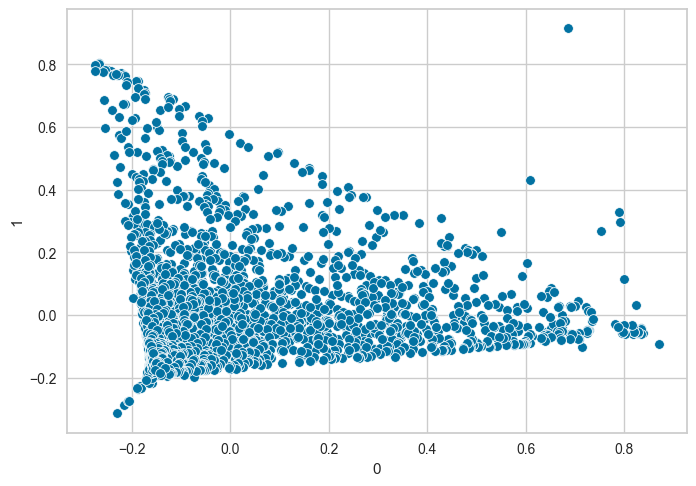

In [136]:
sns.scatterplot(x = 0, y = 1, data = df_pca)

#### 5.3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

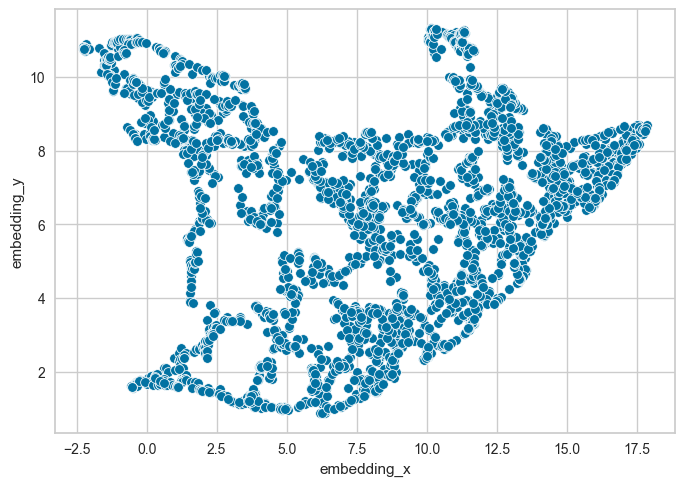

In [137]:
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X)

df_umap = pd.DataFrame()

# embedding
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', data = df_umap)

#### 5.3.3. t-SNE

C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

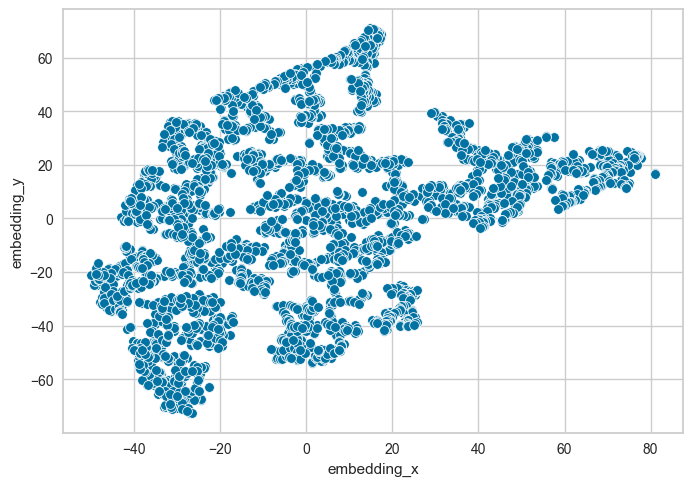

In [138]:
reducer = TSNE(n_components = 2, random_state = 42)
embedding = reducer.fit_transform(X)

df_tsne = pd.DataFrame()

# embedding
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', data = df_tsne)

#### 5.3.4. Baseado em árvores

In [139]:
# training dataset
X = df1.drop(columns = ['customer_id', 'gross_revenue'], axis = 1)
y = df1['gross_revenue']

# model definition
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

# model training
rfr.fit(X, y)

# dataframe Leaf
df_leaf = pd.DataFrame(rfr.apply(X))
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3187,3084,3201,3420,3234,3100,3203,3040,3089,3403,...,3305,3003,3185,3197,3176,3211,2767,3255,3451,3265
1,3070,3092,3184,3058,3171,3062,3119,3221,3086,3190,...,2959,3125,3167,3156,3140,3150,3215,3193,3057,3254
2,3779,3750,3714,3696,3693,3670,3650,3529,3744,3694,...,3504,3668,3682,3696,3661,3688,3654,3668,3722,3725
3,1458,1427,1475,1568,1510,2237,2234,1609,1393,2181,...,1506,1724,2003,1482,1350,1805,2124,1837,1881,2182
4,231,936,307,985,188,225,202,211,271,745,...,478,119,815,718,137,161,661,649,632,764


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

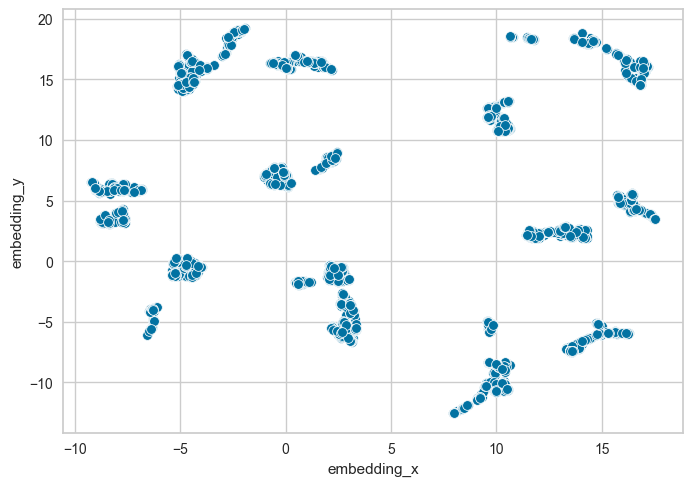

In [140]:
# Reduzer dimensionality
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', data = df_umap)

## 6. PREPARAÇÃO DOS DADOS

In [75]:
# cópia
df4 = df1.copy()

# Min Max Scaler
mms = MinMaxScaler()

df4['gross_revenue']          = mms.fit_transform(df4[['gross_revenue']])
df4['recency_days']           = mms.fit_transform(df4[['recency_days']])
df4['qtde_invoices']          = mms.fit_transform(df4[['qtde_invoices']])
df4['qtde_items']             = mms.fit_transform(df4[['qtde_items']])
df4['qtde_products']          = mms.fit_transform(df4[['qtde_products']])
df4['avg_ticket']             = mms.fit_transform(df4[['avg_ticket']])
df4['avg_recency_days']       = mms.fit_transform(df4[['avg_recency_days']])
df4['frequency']              = mms.fit_transform(df4[['frequency']])
df4['qtde_returns']           = mms.fit_transform(df4[['qtde_returns']])
df4['avg_basket_size']        = mms.fit_transform(df4[['avg_basket_size']])
df4['avg_unique_basket_size'] = mms.fit_transform(df4[['avg_unique_basket_size']])

## 7. SELEÇÃO DE VARIÁVEIS

## 8. HIPERPARÂMETROS FINE-TUNNING

In [76]:
# deletando a coluna de indetificação dos clientes
X = df4.drop(columns = ['customer_id'])

In [77]:
# clusters
clusters = [2, 3, 4, 5, 6, 7]

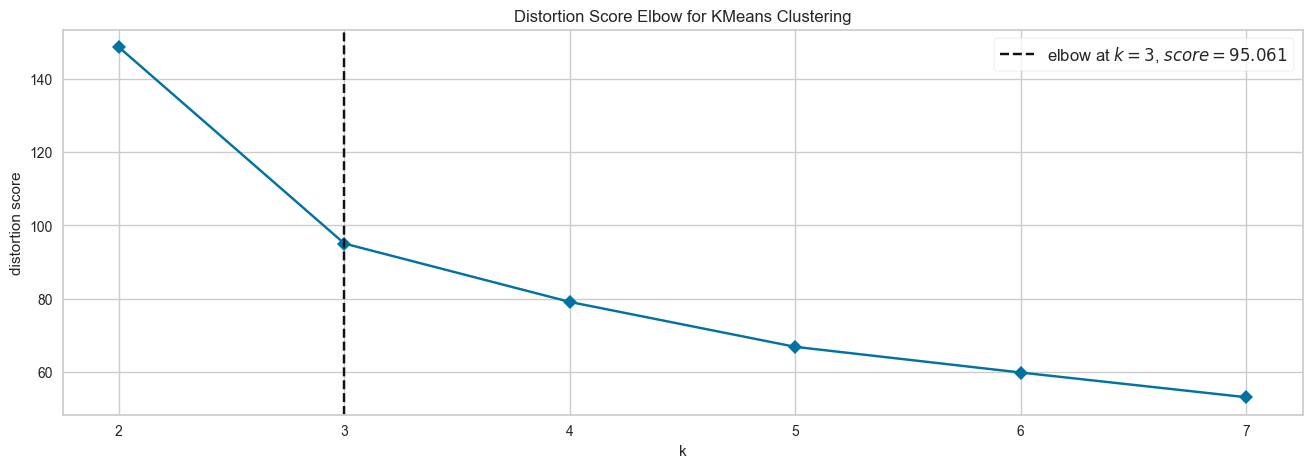

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
# within cluster sum of squares
fig, ax = plt.subplots(figsize = (16, 5))
wcss = KElbowVisualizer(KMeans(), k = clusters, timings = False, ax = ax)
wcss.fit(X)
wcss.show()

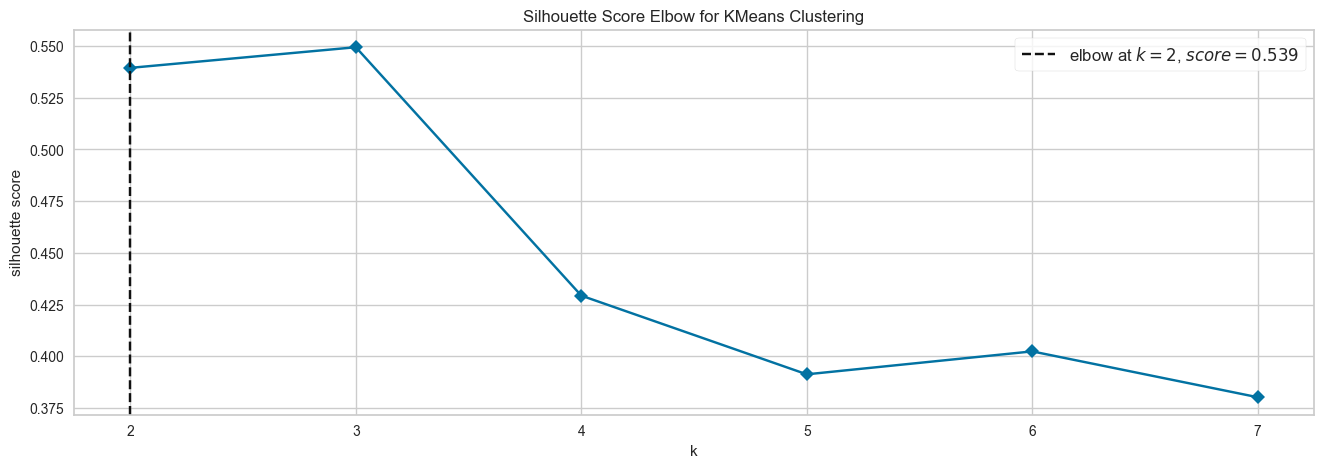

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [79]:
# silhouette score
fig, ax = plt.subplots(figsize = (16, 5))
sil = KElbowVisualizer(KMeans(), k = clusters, metric = 'silhouette', timings = False, ax = ax)
sil.fit(X)
sil.show()

### 8.1. Análise da silhueta

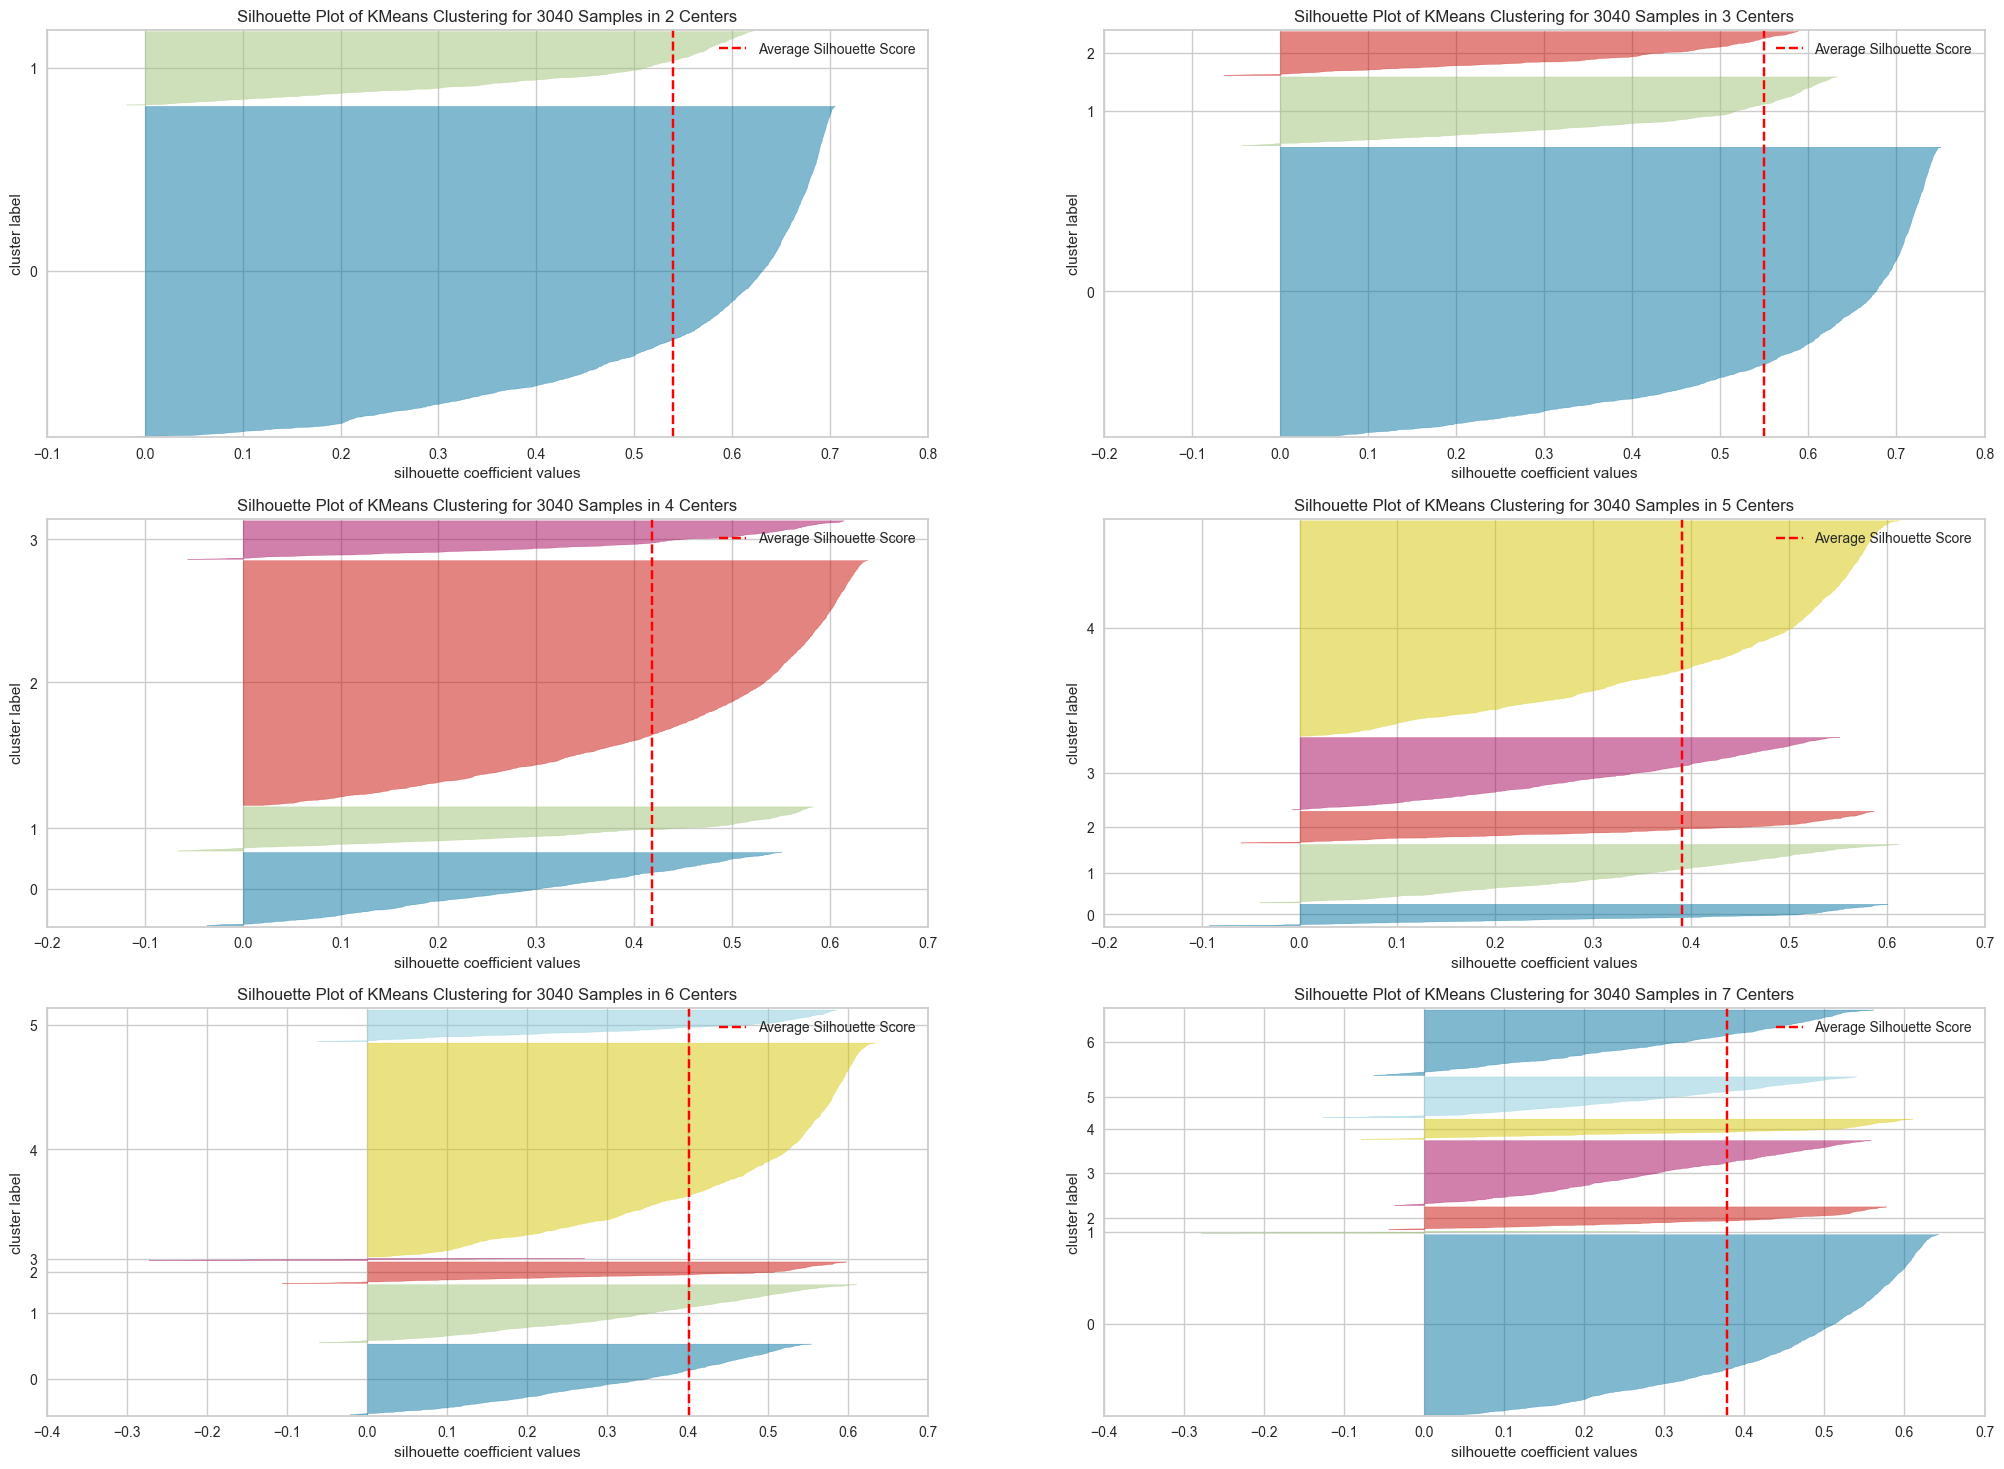

In [80]:
fig, ax = plt.subplots(3, 2, figsize = (25, 18))

for k in clusters:
    km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

## 9. TREINAMENTO DO MODELO

### 9.1. K-Means

In [81]:
# número de clusters
k = 3

# definição do modelo
kmeans = KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300)

# treinamento
kmeans.fit(X)

# rótulos
labels = kmeans.labels_

### 9.2. Validação dos clusters

In [82]:
# within cluster sum of squares
print(f'WCSS: {kmeans.inertia_}')

# silhouette score
print(f'SS: {silhouette_score(X, labels, metric = "euclidean")}')

WCSS: 95.06093042701805
SS: 0.549412482845295


## 10. ANÁLISE DOS CLUSTERS

In [84]:
# cópia
df5 = df1.copy()

# criação de uma coluna com os clusters atribuídos pelo modelo
df5['cluster'] = labels
df4['cluster'] = labels

### 10.1. Inspeção visual

C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


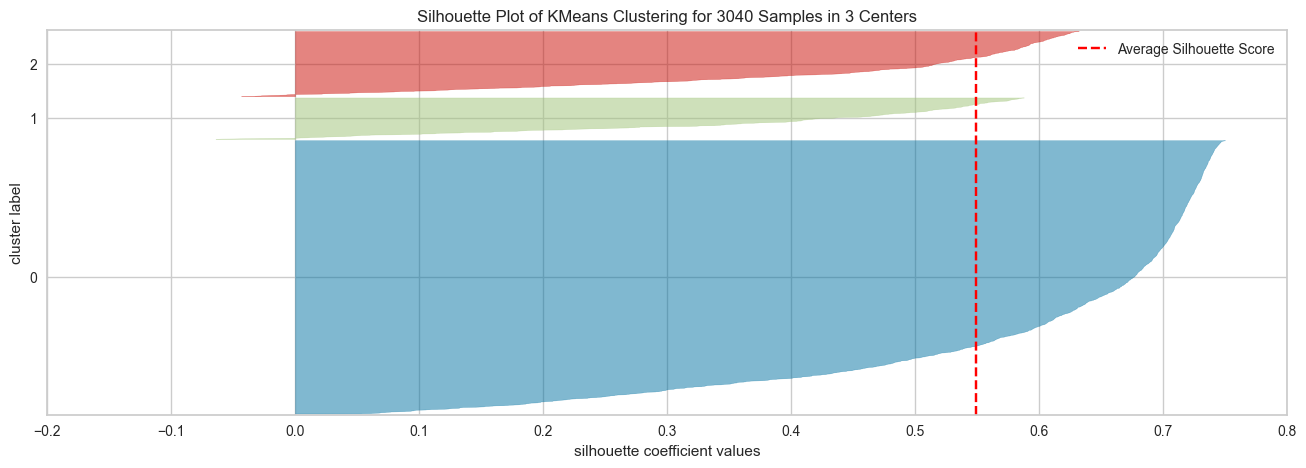

In [85]:
fig, ax = plt.subplots(figsize = (16, 5))
visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax)
visualizer.fit(X)
visualizer.finalize()

### 10.2. Gráfico 2D

In [89]:
df_viz = df4.drop(columns = 'customer_id', axis = 1)
#sns.pairplot(df_viz, hue = 'cluster')

### 10.3. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

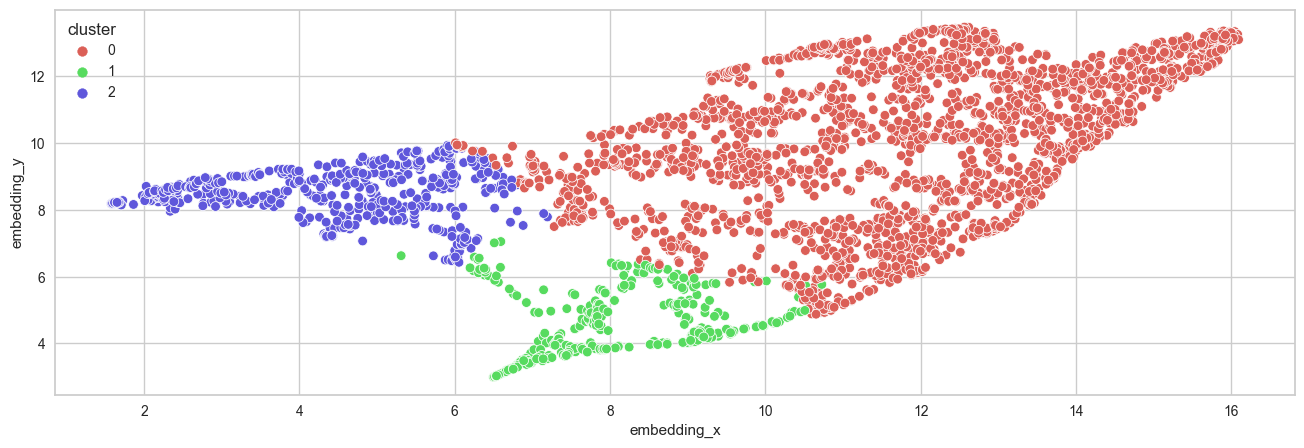

In [90]:
reducer = umap.UMAP(n_neighbors = 80, random_state = 42)
embedding = reducer.fit_transform(X)

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
plt.figure(figsize = (16, 5))
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', hue = 'cluster', 
                palette = sns.color_palette('hls', n_colors = len(df_viz['cluster'].unique())), data = df_viz)

### 10.4. Perfil dos clusters

In [141]:
'''
# quantidade de clientes de cada cluster
df_cluster = df5[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# faturamento médio de cada cluster
df_aux = df5[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_aux, how = 'inner', on = 'cluster')

# recência média de cada cluster
df_aux = df5[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_aux, how = 'inner', on = 'cluster')

# quantidade média de compras por cluster
df_aux = df5[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_aux, how = 'inner', on = 'cluster')
'''

"\n# quantidade de clientes de cada cluster\ndf_cluster = df5[['customer_id', 'cluster']].groupby('cluster').count().reset_index()\ndf_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum())\n\n# faturamento médio de cada cluster\ndf_aux = df5[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()\ndf_cluster = pd.merge(df_cluster, df_aux, how = 'inner', on = 'cluster')\n\n# recência média de cada cluster\ndf_aux = df5[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()\ndf_cluster = pd.merge(df_cluster, df_aux, how = 'inner', on = 'cluster')\n\n# quantidade média de compras por cluster\ndf_aux = df5[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()\ndf_cluster = pd.merge(df_cluster,df_aux, how = 'inner', on = 'cluster')\n"

In [142]:
'''
# resumo das informações
for i in range(len(df_cluster)):
    aux = df_cluster.loc[i, :].values
    
    print(f'### Cluster {i} ###')
    print(f'- Quantidade de clientes: {aux[1]:.0f} ({aux[2]:.2f}%);\n'
          f'- Recência média: {aux[4]:.0f} dias;\n'
          f'- Quantidade média de compras: {aux[5]:.0f};\n'
          f'- Faturamento médio: ${aux[3]:.2f}.\n')
          '''

"\n# resumo das informações\nfor i in range(len(df_cluster)):\n    aux = df_cluster.loc[i, :].values\n    \n    print(f'### Cluster {i} ###')\n    print(f'- Quantidade de clientes: {aux[1]:.0f} ({aux[2]:.2f}%);\n'\n          f'- Recência média: {aux[4]:.0f} dias;\n'\n          f'- Quantidade média de compras: {aux[5]:.0f};\n'\n          f'- Faturamento médio: ${aux[3]:.2f}.\n')\n          "

## 11. IMPLEMENTAÇÃO DO MODELO